# Figure 3b

This notebook loads the data and produces figure 3b. The intermediate file "figure3b.csv" is saved here and reloaded to be used for the figure. You can reproduce the figure starting from that point in the code by downloading "figure3b.csv" from our data repository. 

In [1]:
plotsavedate = '20251031'

In [2]:
data_folder = '' # path to data - not needed for you to rerun figure
figure_data_path = '' # save the data from the data repository here in a subfolder called "FigureData"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
import numpy as np

## Load and process data

In [5]:
all_labels = pd.read_csv(data_folder + 'clustering_labels_saved_20251031.csv', index_col=0)
ct_dict = all_labels['Kmeans_nc8'].value_counts()

## Save and reload 
Then the following plotting script can be run by anyone using the posted data.

In [6]:
# Save
## Add "paper_cluster_labels" so someone downloading the data sees labels that match the paper
cluster_order_numbers8_v3 = [1, 3, 5, 2, 6, 7, 4, 0]
tmp = pd.DataFrame(ct_dict).reset_index()
for i, j in enumerate(cluster_order_numbers8_v3):
    idx = tmp[tmp['Kmeans_nc8']==j].index
    tmp.loc[idx, 'paper_cluster_labels'] = i+1
tmp['paper_cluster_labels'] = tmp['paper_cluster_labels'].astype(int)
tmp.to_csv(figure_data_path + 'FigureData/figure3b.csv')

### Rerun from here if reloading data

In [7]:
# Reload
ct_dict = dict(pd.read_csv(figure_data_path + 'FigureData/figure3b.csv', index_col='Kmeans_nc8')[['count']])['count']

## Plot

In [8]:
label_mapping = {}
label_mapping['Nice Names'] = {0:'University/college campuses',
                               1:'Weekday daytime short stops',
                               2:'City neighborhoods',
                               3:'Weekday daytime long stops',
                               4:'Gas station very short stops',
                               5:'Weekend evening recreation',
                               6:'City destinations',
                               7:'Hotels'}

colours_dict8_v3 = {1:'#006837',
                    3:'#1a9850',
                    5:'#a6d96a',
                    2:'#fdae61',
                    6:'#f46d43',
                    7:'#cb181d',
                    4:'#df65b0',
                    0:'#8073ac'}

### Pie chart

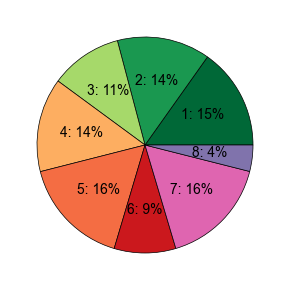

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(10, 3))
_wedges, labels, percentages = axes.pie([ct_dict[j] for j in cluster_order_numbers8_v3], 
         colors=[colours_dict8_v3[j] for j in cluster_order_numbers8_v3], 
         autopct='%1.0f%%', textprops={'fontsize':10, 'color':'k'}, wedgeprops = {'linewidth': .5, 'edgecolor':'k'},
                                       labels=[str(i+1)+': '+label_mapping['Nice Names'][j] for i, j in enumerate(cluster_order_numbers8_v3)])
for label, percentage in zip(labels, percentages):
    percentage.set_text(label.get_text()[0:1]+': ' + percentage.get_text())
    label.remove()
plt.tight_layout()
plt.savefig('Figures/figure3b_us_wide_clustersplit8_'+plotsavedate+'_unlabelled.pdf', dpi=400, bbox_inches='tight')
plt.savefig('Figures/figure3b_us_wide_clustersplit8_'+plotsavedate+'_unlabelled.png', dpi=400, bbox_inches='tight')
plt.show()

### Legend

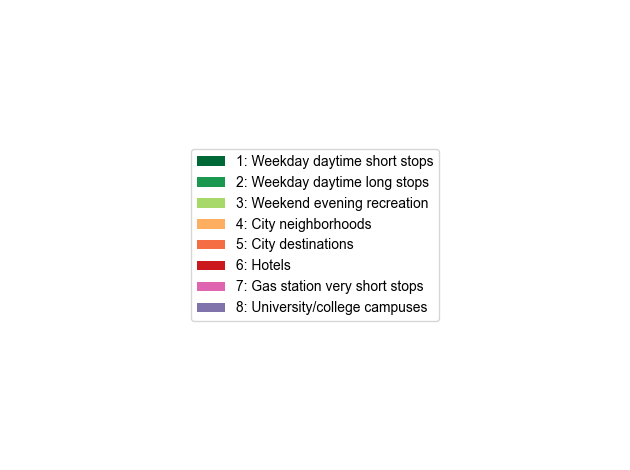

In [10]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [Patch(facecolor=colours_dict8_v3[j], label=str(i+1)+': '+label_mapping['Nice Names'][j]) for i, j in enumerate(cluster_order_numbers8_v3)]

fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center')
ax.axis('off')
plt.tight_layout()
plt.savefig('Figures/legend_clustering_'+plotsavedate+'.pdf', bbox_inches='tight')
plt.show()